<table style="width:100%">
  <tr>
    <th align="center">
    <h1 align="center">Laboratorio 4</h1>
    <h2 align="center">Estadistica Computacional</h2>
    <h3 align="center">Juan Pablo León 201473047-0</h3>
    </th> 
  </tr>

# Comentario
Antes de continuar, querría justificarme por haber entregado este laboratorio un par de horas atrasado. La razón fue que, inicialmente, había terminado mi parte del laboratorio, pues como es en parejas suelo dividirme el trabajo con mi compañero, pero en esta ocasión mi compañero me avisó que no iba a realizar el LEC el día antes de la entrega debido a la acumulación de pruebas, por lo que tuve que terminar el LEC solo a las 21:30 luego de una prueba de Computación Científica. Gracias por su compresión.

# 1.- Método de Muestreo: Bootstrapping

In [18]:
import random 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1.- Escritura del algoritmo the bootstrapping con reemplazo, para $R$ remuestreos de una muestra $X$:

In [2]:
def bootstrapping(R, X):
    muestraSize = len(X)
    muestras = []
    muestraTemp = []
    
    # remuestreo
    for i in range(R):
        muestraTemp = []
        for j in range(muestraSize):
            index = random.randint(0, muestraSize-1)
            muestraTemp.append(X[index])
        muestras.append(muestraTemp)
    
    
    # calculo de las medias
    medias = []
    for i in range(R):
        medias.append(np.mean(muestras[i]))
    
    return medias
    
#R = 10
#X = [1,2,3,4,5,6,7,8,9]
#a = bootstrapping(R,X)



2.- Descripción de la población _population.csv_:
* Cantidad de individuos: 450.
* Media de notas para cada asignatura: 

In [91]:
poblacion = pd.read_csv("population.csv",converters={"":int, "math score":int, 
                                                     "reading score":int, "writing score": int})

mediaMate = np.mean(poblacion['math score'])
mediaLectura = np.mean(poblacion['reading score'])
mediaEscritura = np.mean(poblacion['writing score'])

print("Nota media en matemáticas: " + str(round(mediaMate,2)))
print("Nota media en lectura: " + str(round(mediaLectura,2)))
print("Nota media en escritura: " + str(round(mediaEscritura,2)))

Nota media en matemáticas: 66.22
Nota media en lectura: 69.8
Nota media en escritura: 68.87


* Histogramas de notas para cada asignatura:

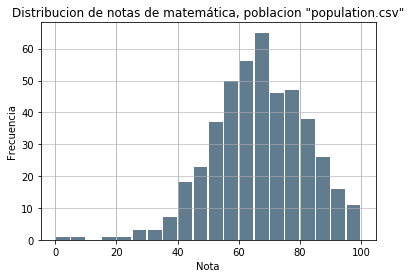

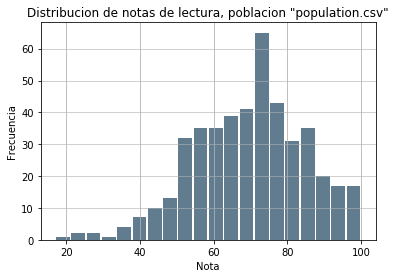

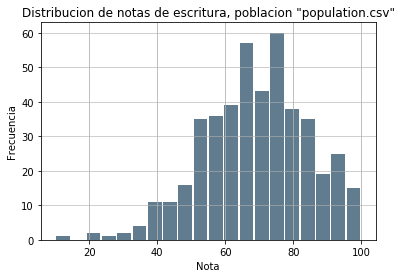

In [4]:
plt.figure(1)
poblacion['math score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de matemática, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(2)
poblacion['reading score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de lectura, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(3)
poblacion['writing score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de escritura, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


3.- Descripción de la muestra _sample.csv_:
* Cantidad de individuos: 45.
* Medias de notas para cada asignatura:

In [5]:
poblacionSample = pd.read_csv("sample.csv",converters={"":int, "math score":int, 
                                                     "reading score":int, "writing score": int})

mediaMateSample = np.mean(poblacionSample['math score'])
mediaLecturaSample = np.mean(poblacionSample['reading score'])
mediaEscrituraSample = np.mean(poblacionSample['writing score'])

print("Nota media en matemáticas: " + str(round(mediaMateSample,1)))
print("Nota media en lectura: " + str(round(mediaLecturaSample,1)))
print("Nota media en escritura: " + str(round(mediaEscrituraSample,1)))

Nota media en matemáticas: 64.2
Nota media en lectura: 66.2
Nota media en escritura: 66.1


* Histogramas de notas para cada asignatura:

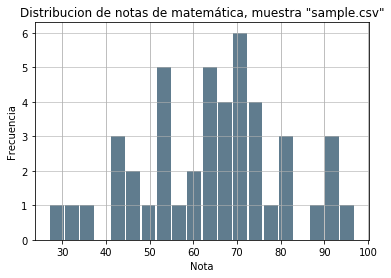

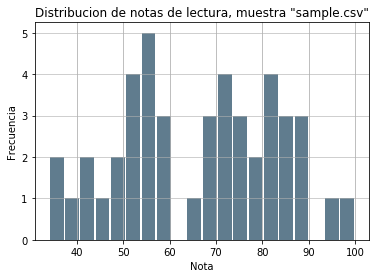

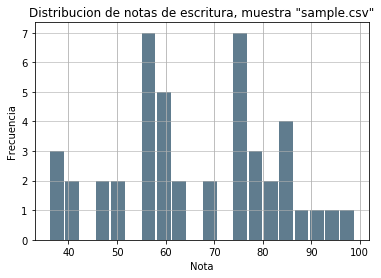

In [6]:
plt.figure(4)
poblacionSample['math score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de matemática, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(5)
poblacionSample['reading score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de lectura, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(6)
poblacionSample['writing score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de escritura, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

4.- Determinamos el valor de $R$ lo suficientemente grande (para la asignatura de matemática):
* Obtenemos la distribución de la media utilizando nuestro algoritmo de _bootstrapping_:

In [56]:
R = [1, 5, 25, 100, 1000]
distribucionesMedia = []
for i in R:
    distribucionesMedia.append(bootstrapping(i, poblacionSample['math score']))

* Graficamos las distribuciones de la media en histogramas:

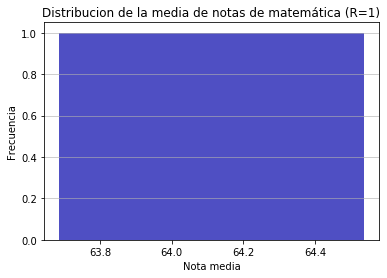

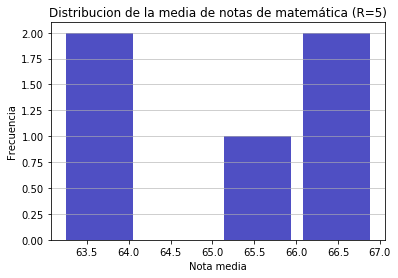

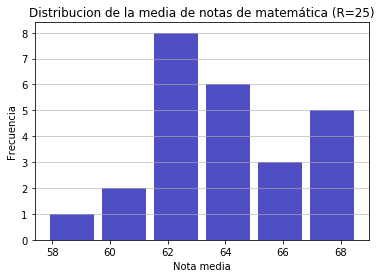

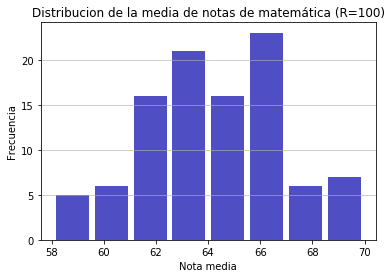

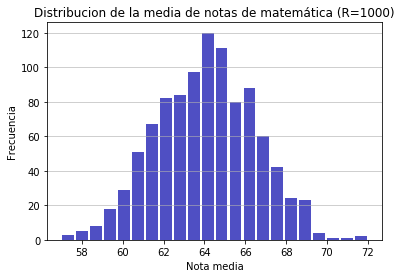

In [57]:
# R=1
plt.figure(7)
n, bins, patches = plt.hist(x=distribucionesMedia[0], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=1)')
plt.show()

# R=5
plt.figure(8)
n, bins, patches = plt.hist(x=distribucionesMedia[1], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=5)')
plt.show()

# R=25
plt.figure(9)
n, bins, patches = plt.hist(x=distribucionesMedia[2], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=25)')
plt.show()

# R=100
plt.figure(10)
n, bins, patches = plt.hist(x=distribucionesMedia[3], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=100)')
plt.show()

# R=1000
plt.figure(11)
n, bins, patches = plt.hist(x=distribucionesMedia[4], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=1000)')
plt.show()

* Obtenemos el intervalo de confianza de la media para un valor de confianza de 90% (no se puede calcular para R=1):

In [90]:
sigma = np.std(poblacion['math score'])
print("Desviación estandar de la población: " + str(sigma) + "\n")

# R=5
media5 = np.mean(distribucionesMedia[1])
intervalo_conf_5 = stats.norm.interval(0.90, loc=media5, scale=sigma/np.sqrt(5))
print("Media R=5: " + str(media5))
print("Intervalo de confianza R=5: " + str(intervalo_conf_5) + "\n")

# R=25
media25 = np.mean(distribucionesMedia[2])
intervalo_conf_25 = stats.norm.interval(0.90, loc=media25, scale=sigma/np.sqrt(25))
print("Media R=25: " + str(media25))
print("Intervalo de confianza R=25: " + str(intervalo_conf_25) + "\n")

# R=100
media100 = np.mean(distribucionesMedia[3])
intervalo_conf_100 = stats.norm.interval(0.90, loc=media100, scale=sigma/np.sqrt(100))
print("Media R=100: " + str(media100))
print("Intervalo de confianza R=100: " + str(intervalo_conf_100) + "\n")

# R=1000
media1000 = np.mean(distribucionesMedia[4])
intervalo_conf_1000 = stats.norm.interval(0.90, loc=media1000, scale=sigma/np.sqrt(1000))
print("Media R=1000: " + str(media1000))
print("Intervalo de confianza R=1000: " + str(intervalo_conf_1000))

Desviación estandar de la población: 15.431801219847571

Media R=5: 65.18222222222221
Intervalo de confianza R=5: (53.83057528560182, 76.53386915884259)

Media R=25: 63.85688888888889
Intervalo de confianza R=25: (58.7802780475168, 68.93349973026098)

Media R=100: 64.20466666666667
Intervalo de confianza R=100: (61.666361245980625, 66.74297208735271)

Media R=1000: 64.09064444444445
Intervalo de confianza R=1000: (63.28796179179247, 64.89332709709643)


* Comparamos el valor de la media para cada población R y verificamos si está dentro del intervalo de confianza (90%):

Recordamos que el valor de la media del puntaje en matemáticas en la población es $\mu = 66.22$, como se puede observar este valor está dentro de los intervalos de confianza para $R=5, 25, 100$ pero fuera del intervalo para $R=1000$.

Observar que la media de la muestra siempre se encuentra al centro del intervalo de confianza. Al aumentar el valor de R el intervalo de confianza se vuelve cada vez más pequeño, acercándose al valor de la media de la muestra. Por lo general, es recomendable tomar $R=1000$ para realizar bootstrapping pues es el mayor valor (o tomar otro valor incluso mayor que este) y encierra mejor la media de la muestra.

5.- Primero obtenemos los intervalos de confianza para la asignatura de lectura con $R = 1000$:

In [95]:
boot_reading = bootstrapping(1000, poblacionSample['reading score'])
mediaR = np.round(np.mean(boot_reading), 4)
sigma = np.std(poblacionSample['reading score'])
print("Media R=1000: " + str(mediaR) + "\n")

# confianza 70%
r_conf_70 = stats.norm.interval(0.70, loc=mediaR, scale=sigma/np.sqrt(1000))

# confianza 80%
r_conf_80 = stats.norm.interval(0.80, loc=mediaR, scale=sigma)

# confianza 90%
r_conf_90 = stats.norm.interval(0.90, loc=mediaR, scale=sigma)

# confianza 95%
r_conf_95 = stats.norm.interval(0.95, loc=mediaR, scale=sigma)

# confianza 99%
r_conf_99 = stats.norm.interval(0.99, loc=mediaR, scale=sigma)

print("Intervalo de confianza 70%, medias asignatura lectura: " + str(r_conf_70))
print("Intervalo de confianza 80%, medias asignatura lectura: " + str(r_conf_80))
print("Intervalo de confianza 90%, medias asignatura lectura: " + str(r_conf_90))
print("Intervalo de confianza 95%, medias asignatura lectura: " + str(r_conf_95))
print("Intervalo de confianza 99%, medias asignatura lectura: " + str(r_conf_99))


Media R=1000: 66.1792

Intervalo de confianza 70%, medias asignatura lectura: (65.63187767999456, 66.72652232000543)
Intervalo de confianza 80%, medias asignatura lectura: (44.778013630705175, 87.58038636929481)
Intervalo de confianza 90%, medias asignatura lectura: (38.71107466893705, 93.64732533106293)
Intervalo de confianza 95%, medias asignatura lectura: (33.44890990634899, 98.909490093651)
Intervalo de confianza 99%, medias asignatura lectura: (23.16430737855876, 109.19409262144123)


El valor de la media del puntaje en lectura es $\mu = 69.8$, por lo que este cae dentro de los intervalos con confianza $80\%$, $90\%$, $95\%$ y $99\%$.

Luego obtenemos los intervalos de confianza para la asignatura de matemática:

In [99]:
boot_math = bootstrapping(1000, poblacionSample['math score'])
mediaR = np.round(np.mean(boot_math), 4)
sigma = np.std(poblacionSample['math score'])
print("Media R=1000: " + str(mediaR) + "\n")

# confianza 70%
m_conf_70 = stats.norm.interval(0.70, loc=mediaR, scale=sigma/np.sqrt(1000))

# confianza 80%
m_conf_80 = stats.norm.interval(0.80, loc=mediaR, scale=sigma)

# confianza 90%
m_conf_90 = stats.norm.interval(0.90, loc=mediaR, scale=sigma)

# confianza 95%
m_conf_95 = stats.norm.interval(0.95, loc=mediaR, scale=sigma)

# confianza 99%
m_conf_99 = stats.norm.interval(0.99, loc=mediaR, scale=sigma)

print("Intervalo de confianza 70%, medias asignatura matematica: " + str(m_conf_70))
print("Intervalo de confianza 80%, medias asignatura matematica: " + str(m_conf_80))
print("Intervalo de confianza 90%, medias asignatura matematica: " + str(m_conf_90))
print("Intervalo de confianza 95%, medias asignatura matematica: " + str(m_conf_95))
print("Intervalo de confianza 99%, medias asignatura matematica: " + str(m_conf_99))


Media R=1000: 64.2388

Intervalo de confianza 70%, medias asignatura matematica: (63.708774054132505, 64.76882594586749)
Intervalo de confianza 80%, medias asignatura matematica: (43.513929784658934, 84.96367021534107)
Intervalo de confianza 90%, medias asignatura matematica: (37.63871705498336, 90.83888294501662)
Intervalo de confianza 95%, medias asignatura matematica: (32.542846205839766, 95.93475379416023)
Intervalo de confianza 99%, medias asignatura matematica: (22.583255698715725, 105.89434430128426)


Recordando que el valor de la media del puntaje en matematica de la población es $\mu = 66.22$, podemos ver que este queda dentro de los intervalos con confianza superior a $80\%$.

Finalmente obtenemos los intervalos de confianza para la asignatura de escritura:

In [100]:
boot_writing = bootstrapping(1000, poblacionSample['writing score'])
mediaR = np.round(np.mean(boot_writing), 4)
sigma = np.std(poblacionSample['writing score'])
print("Media R=1000: " + str(mediaR) + "\n")

# confianza 70%
w_conf_70 = stats.norm.interval(0.70, loc=mediaR, scale=sigma/np.sqrt(1000))

# confianza 80%
w_conf_80 = stats.norm.interval(0.80, loc=mediaR, scale=sigma)

# confianza 90%
w_conf_90 = stats.norm.interval(0.90, loc=mediaR, scale=sigma)

# confianza 95%
w_conf_95 = stats.norm.interval(0.95, loc=mediaR, scale=sigma)

# confianza 99%
w_conf_99 = stats.norm.interval(0.99, loc=mediaR, scale=sigma)

print("Intervalo de confianza 70%, medias asignatura escritura: " + str(w_conf_70))
print("Intervalo de confianza 80%, medias asignatura escritura: " + str(w_conf_80))
print("Intervalo de confianza 90%, medias asignatura escritura: " + str(w_conf_90))
print("Intervalo de confianza 95%, medias asignatura escritura: " + str(w_conf_95))
print("Intervalo de confianza 99%, medias asignatura escritura: " + str(w_conf_99))


Media R=1000: 65.9964

Intervalo de confianza 70%, medias asignatura escritura: (65.46840764006144, 66.52439235993855)
Intervalo de confianza 80%, medias asignatura escritura: (45.35104627772466, 86.64175372227533)
Intervalo de confianza 90%, medias asignatura escritura: (39.49837536893504, 92.49442463106494)
Intervalo de confianza 95%, medias asignatura escritura: (34.42205618765858, 97.5707438123414)
Intervalo de confianza 99%, medias asignatura escritura: (24.500678306296166, 107.49212169370382)


El valor de la media del puntaje en escritura de la población es $\mu = 68.87$, el cual queda dentro de los intervalos con confianza de $80\%$ y superior.

Como es fácil de observar, el aumentar valor de la confianza tiene el efecto de ampliar el intervalo, pues se toma un rango mayor de valores para "estar más seguro" de que la media de la población podría estar en el intervalo.